In [51]:
import numpy as np
import matplotlib.pyplot as plt

$\Huge \textbf{Paramètres globaux}$
---------------------------------------------------------------------------


In [52]:
NB_ELEVES = 100            # Nombre d'étudiants
DUREE_MOOC = 10            # Durée du contenu vidéo (heures)
DUREE_VISIONNAGE = 10      # en heures 
MIX_ELEC_FR = 0.0519       # kgCO2e/kWh

$\Huge \textbf{Paramètres pour les terminaux}$
----------------------------------------------------

In [53]:
NB_SMARTPHONE = 40       # 40 des 100
NB_LAPTOP = 40           # 40 des 100
NB_PC_FIXE = 20          # 20 des 100

$\Huge \textbf{Structures des terminaux}$

* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie du terminal.
* $\textbf{usage\_moyen}$ : représente l'usage moyen du terminal en $\text{kWh}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).






In [54]:
appareils = {
    'smartphone': {
        'duree_vie': 3, 'duree_utilisation': 3, 
        'heures_an': 365*3, 'usage_moyen': 3.9,
        'gwp': 79.5, 'adpe': 0.00283, 'adpf': 813
    },
    'laptop': {
        'duree_vie': 5, 'duree_utilisation': 6,
        'heures_an': 365*6, 'usage_moyen': 29.1,
        'gwp': 185, 'adpe': 0.00951, 'adpf': 2480
    },
    'pc_fixe': {
        'duree_vie': 5, 'duree_utilisation': 3,
        'heures_an': 365*3, 'usage_moyen': 100,
        'gwp': 268, 'adpe': 0.022, 'adpf': 4790
    },
    'ecran': {
        'duree_vie': 5, 'duree_utilisation': 3,
        'heures_an': 365*3, 'usage_moyen': 70,
        'gwp': 69.8, 'adpe': 0.0117, 'adpf': 1350
    }
}

$\Huge \textbf{Calcul impact des terminaux (hors usage) (unité : kg CO2 eq)}$ 

In [55]:
def impact_terminal(appareil):
    return appareil['gwp']*(DUREE_VISIONNAGE/(appareil['duree_vie']*appareil['heures_an']))

In [56]:
impact_agrege_sm = impact_terminal(appareils["smartphone"])
impact_agrege_pc = impact_terminal(appareils["pc_fixe"]) + impact_terminal(appareils['ecran'])
impact_agrege_op = impact_terminal(appareils["laptop"])
impact_agrege_tot = NB_PC_FIXE*impact_agrege_pc + NB_LAPTOP*impact_agrege_op + NB_SMARTPHONE*impact_agrege_sm
print(f"L'impact total des terminaux hors usage est {impact_agrege_tot:.2f} kg CO₂ eq")

L'impact total des terminaux hors usage est 28.78 kg CO₂ eq


$\Huge \textbf{Calcul impact de l'usage des terminaux (unité : kg CO2 eq)}$

$$
\text{Impact}_{\text{Usage}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{0,052}_{\text{Mix France}}
$$

In [57]:
def impact_usage_terminal(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*MIX_ELEC_FR

In [58]:
impact_usage_sm = impact_usage_terminal(appareils['smartphone'])
impact_usage_op = impact_usage_terminal(appareils["laptop"])
impact_usage_pc = impact_usage_terminal(appareils['pc_fixe']) + impact_usage_terminal(appareils['ecran'])
impact_usage_tot = NB_PC_FIXE*impact_usage_pc + NB_LAPTOP*impact_usage_op + NB_SMARTPHONE*impact_usage_sm
print(f"L'impact total de l'usage des terminaux est {impact_usage_tot:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 1.96 kg CO₂ eq


$\Huge \textbf{Calcul impact total des terminaux (unité : kg CO2 eq)}$

In [59]:
impact_tot_ter = impact_usage_tot + impact_agrege_tot
print(f"L'impact total de l'usage des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 30.74 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des terminaux (unité : kg Sb eq)}$

In [60]:
def impact_abio(appareil):
    return appareil['adpe']*(DUREE_VISIONNAGE/(appareil['heures_an']*appareil['duree_vie']))

In [61]:
impact_abio_sm = impact_abio(appareils["smartphone"])
impact_abio_pc = impact_abio(appareils["pc_fixe"]) + impact_abio(appareils['ecran'])
impact_abio_op = impact_abio(appareils["laptop"])
impact_abio_tot = NB_PC_FIXE*impact_abio_pc + NB_LAPTOP*impact_abio_op + NB_SMARTPHONE*impact_abio_sm
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des terminaux est  0.0019 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des terminaux (unité : MJ)}$

$\text{Il faut aussi convertir l'énergie consommée pour l'usage des terminaux en énergie primaire pour avoir la totalité de l'impact}$

$$
\text{Conversion}_{\text{énergie consommée}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{2,3}_{\text{coef d'énergie primaire}} \times \underbrace{\text{3,6}}_{\text{1kWh=3,6MJ}}
$$

In [62]:
COEF_EP = 2.3   # kWh - pour 1 kWh d'électricité en énergie finale, 2,3 kWh d'énergie primaire auront été consommés en moyenne
def impact_ep(appareil):
    return appareil['adpf']*(DUREE_VISIONNAGE/(appareil['heures_an']*appareil['duree_vie']))
def conversion_eCons_en_ePrim(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*COEF_EP*3.6

In [63]:
# La conversion
ep_usage_sm = conversion_eCons_en_ePrim(appareils['smartphone'])
ep_usage_pc = conversion_eCons_en_ePrim(appareils['pc_fixe']) + conversion_eCons_en_ePrim(appareils['ecran'])
ep_usage_op = conversion_eCons_en_ePrim(appareils['laptop'])
ep_usage_tot = NB_PC_FIXE*ep_usage_pc + NB_LAPTOP*ep_usage_op + NB_SMARTPHONE*ep_usage_sm

In [64]:
impact_ep_sm = impact_ep(appareils['smartphone'])
impact_ep_pc = impact_ep(appareils['pc_fixe']) + impact_ep(appareils['ecran'])
impact_ep_op = impact_ep(appareils['laptop'])
impact_ep_tot = NB_PC_FIXE*impact_ep_pc + NB_LAPTOP*impact_ep_op + NB_SMARTPHONE*impact_ep_sm + ep_usage_tot
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Bilan de l'imapct des termianux pour le MOOC}$


In [65]:
print(f"L'impact total de changement climatique des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

L'impact total de changement climatique des terminaux est 30.74 kg CO₂ eq
L'épuisement abiotique des terminaux est  0.0019 kg Sb eq
La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Calculs impacts réseau}$
----------------------------------------------------

In [66]:
CONSO_DONNEES = 1.5                                     # 1.5 Go/h d'après notre hypothèse
VOL_DONNEES_PAR_ELEVE = CONSO_DONNEES*DUREE_VISIONNAGE  # 15 Go par élève

In [67]:
VOL_DONNES_RESEAU_FIXE = VOL_DONNEES_PAR_ELEVE*(NB_LAPTOP+NB_PC_FIXE)     # 900 Go de traffic par Wi-Fi (60*15)
VOL_DONNES_RESEAU_MOBILE = VOL_DONNEES_PAR_ELEVE*NB_SMARTPHONE            # 600 Go de traffic par 3G/4G/5G (40*15)
TOTAL_TRAFFIC_DONNES = VOL_DONNES_RESEAU_MOBILE + VOL_DONNES_RESEAU_FIXE  # 1500 Go de taffic total

$\Huge \textbf{Structures des réseaux}$
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [68]:
reseaux = {
    'fixe' : {'gwp':1.24e-03, 'adpe': 1.84e-07, 'adpf': 1.01e-01},
    'mobile' :{'gwp':1.31e-02, 'adpe': 8.15e-07, 'adpf': 1.43}
}

$\Huge \textbf{Calcul changement clmatique total des réseaux (unité : kg CO2 eq)}$

In [69]:
impact_res_cc_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['gwp'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['gwp']
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des réseaux (unité : kg Sb eq)}$

In [70]:
impact_res_abio_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['adpe'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['adpe']
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des réseaux est  0.0007 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

In [71]:
impact_res_ep_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['adpf'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['adpf']
print(f"La cosommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.2f} MJ")

La cosommation de l'énergie primaire des réseaux est  948.90 MJ


$\Huge \textbf{Bilan de l'imapct des réseaux pour le MOOC}$

In [72]:
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.1f} MJ")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0007 kg Sb eq
La consommation de l'énergie primaire des réseaux est  948.9 MJ


$\Huge \textbf{Calculs impacts serveur}$
----------------------------------------------------

In [73]:
USAGE_MOOC_DU_SERVEUR = 0.05
CONS_SERVEUR_ANNUEL = 1805       #kWh par an 
PUE = 1.6                        #1,6 pour le refroidissement et l'infrastructure

$\Huge \textbf{Structures du serveur}$

* $\textbf{duree\_utilisation}$ : est la durée de vie du serveur (donnée de la base de ADEME).
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [74]:
serveur = {'duree_utilisation': 5, # annee
           'gwp':7.66e+02, 
           'adpe': 1.86e-02, 
           'adpf': 1.18e+04,
           'usage_annuel': 149.536,  # 1805*1.6*0.0519
           'usage_mooc': 0.05, # Pourcentage d'allocation
           }

$\Huge \textbf{Calcul impact du serveur (hors usage) (unité : kg CO2 eq)}$ 

In [75]:
impact_agrege_serveur = (serveur['gwp']/serveur['duree_utilisation'])

$\Huge \textbf{Calcul de l'usage du serveur(unité : kg CO2 eq)}$ 

In [76]:
cons_reel_du_serv = CONS_SERVEUR_ANNUEL*PUE
impact_usage_annuel = cons_reel_du_serv * MIX_ELEC_FR

In [77]:
cc_serveur_mooc = (impact_agrege_serveur + impact_usage_annuel) * USAGE_MOOC_DU_SERVEUR
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique du serveur (unité : kg Sb eq)}$

In [78]:
impact_abio_serv = (serveur['adpe']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
print(f"L'épuisement abiotique du serveur est  {impact_abio_serv:.4f} kg Sb eq")

L'épuisement abiotique du serveur est  0.0002 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

Le calcul de la consomation de l'énergie primaire est fait en deux étape comme suit:$$EP_{\text{serveur}} = \underbrace{EP_{\text{matériel}}}_{\text{Fabrication amortie}} + \underbrace{EP_{\text{usage}}}_{\text{Consommation électrique}}$$ 
où
$$EP_{\text{matériel}} = \left( \frac{\text{ADPf}_{\text{total}}}{\text{Durée de vie}_{\text{ans}}} \right) \times \text{Allocation}_{\text{MOOC}}$$
et 
$$EP_{\text{usage}} = \underbrace{E_{\text{elec, finale}}}_{\text{(kWh)}} \times \underbrace{2,3}_{\text{Coeff. EP}} \times \underbrace{3,6}_{\text{Conv. MJ}}$$

In [79]:
impact_ep_serv = (serveur['adpf']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
impact_ep_serv = impact_ep_serv + impact_usage_annuel*2.3*3.6
print(f"La consommation de l'énergie primaire du serveur est  {impact_ep_serv:.1f} MJ")

La consommation de l'énergie primaire du serveur est  1359.1 MJ


$\Huge \textbf{Bilan de l'imapct du serveur pour le MOOC}$

In [80]:
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_abio_serv:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_ep_serv:.1f} MJ")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0002 kg Sb eq
La consommation de l'énergie primaire des réseaux est  1359.1 MJ


$\Huge \textbf{Calcul de l'impact total}$
----------------------------------------------------

In [81]:
imapct_tot_cc = cc_serveur_mooc + impact_res_cc_tot + impact_tot_ter
impact_tot_abio = impact_abio_serv + impact_res_abio_tot + impact_abio_tot
impact_tot_ep = impact_ep_serv + impact_res_ep_tot + impact_ep_tot

In [82]:
print(f"L'impact du changement climatique total  est {imapct_tot_cc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique total est  {impact_tot_abio:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire totale est  {impact_tot_ep:.1f} MJ")

L'impact du changement climatique total  est 54.87 kg CO₂ eq
L'épuisement abiotique total est  0.0028 kg Sb eq
La consommation de l'énergie primaire totale est  3034.7 MJ


$\Huge \textbf{Representations graphiques}$
----------------------------------------------------

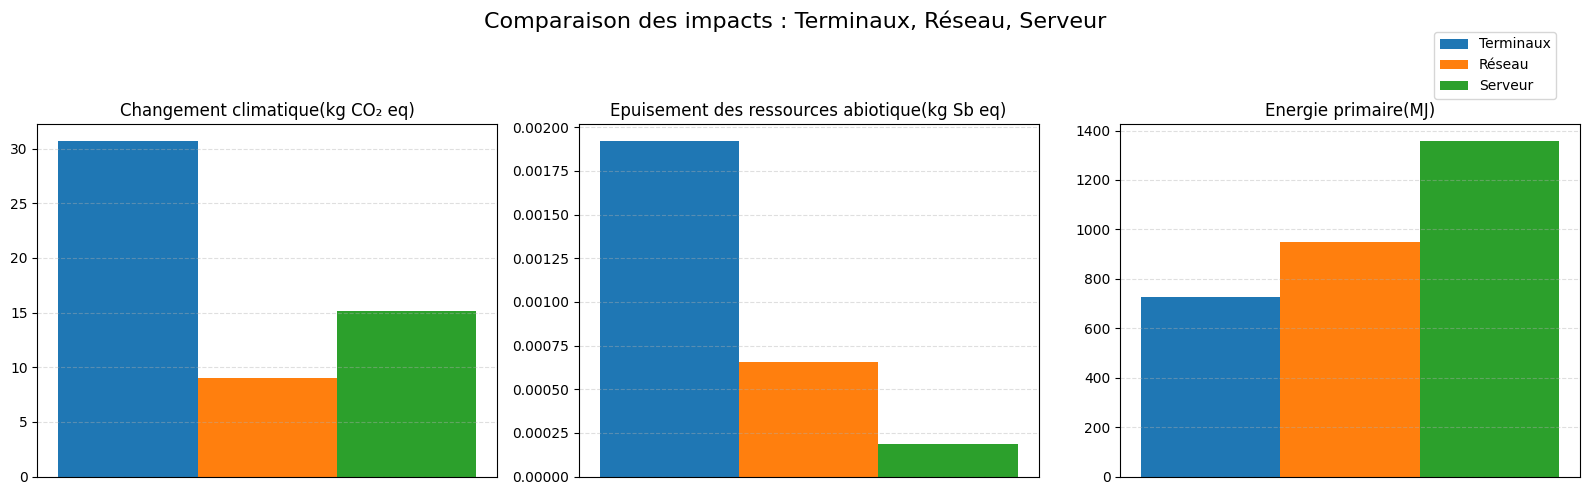

In [83]:
categories = ["Changement climatique(kg CO₂ eq)", 
              "Epuisement des ressources abiotique(kg Sb eq)", 
              "Energie primaire(MJ)"]

imp_terminaux = [impact_tot_ter, impact_abio_tot, impact_ep_tot]
imp_reseau    = [impact_res_cc_tot, impact_res_abio_tot, impact_res_ep_tot]
imp_serveur   = [cc_serveur_mooc, impact_abio_serv, impact_ep_serv]

x = np.arange(1)
largeur = 0.25

# Couleurs fixes
couleur_terminaux = "tab:blue"
couleur_reseau = "tab:orange"
couleur_serveur = "tab:green"

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, ax in enumerate(axes):
    ax.bar(x - largeur, imp_terminaux[i], width=largeur, color=couleur_terminaux)
    ax.bar(x,           imp_reseau[i],    width=largeur, color=couleur_reseau)
    ax.bar(x + largeur, imp_serveur[i],   width=largeur, color=couleur_serveur)
    
    ax.set_title(categories[i], fontsize=12)
    ax.set_xticks([])
    ax.grid(axis="y", linestyle="--", alpha=0.4)

fig.suptitle("Comparaison des impacts : Terminaux, Réseau, Serveur", fontsize=16)

fig.legend(["Terminaux", "Réseau", "Serveur"],
           loc="upper right", bbox_to_anchor=(0.98, 0.95))

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()


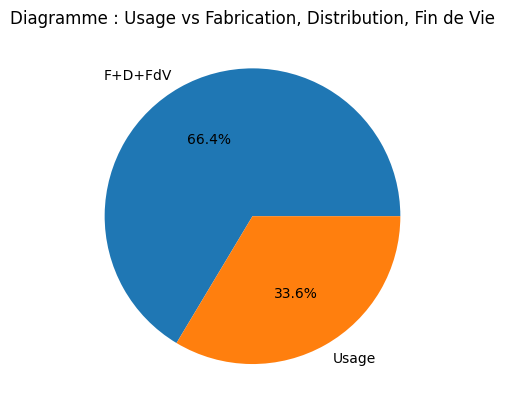

In [84]:
impact_fab = impact_agrege_tot + impact_agrege_serveur* USAGE_MOOC_DU_SERVEUR
impact_usage = impact_usage_tot+ impact_usage_annuel*USAGE_MOOC_DU_SERVEUR + impact_res_cc_tot
impact_usage, impact_fab

labels = ['F+D+FdV', 'Usage']
values = [impact_fab, impact_usage]

plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title("Diagramme : Usage vs Fabrication, Distribution, Fin de Vie")
plt.show()


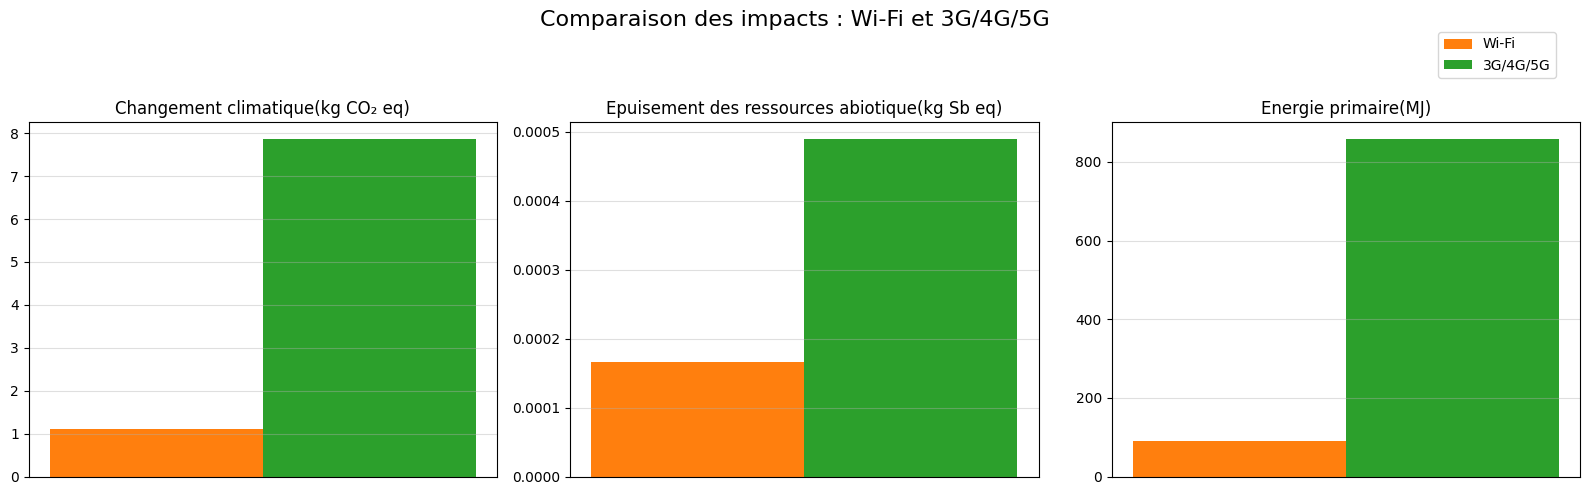

In [85]:
categories = ["Changement climatique(kg CO₂ eq)", 
              "Epuisement des ressources abiotique(kg Sb eq)", 
              "Energie primaire(MJ)"]

res_fixe = [reseaux['fixe']['gwp']*VOL_DONNES_RESEAU_FIXE, reseaux['fixe']['adpe']*VOL_DONNES_RESEAU_FIXE, reseaux['fixe']['adpf']*VOL_DONNES_RESEAU_FIXE]
res_mobile  = [reseaux['mobile']['gwp']*VOL_DONNES_RESEAU_MOBILE, reseaux['mobile']['adpe']*VOL_DONNES_RESEAU_MOBILE, reseaux['mobile']['adpf']*VOL_DONNES_RESEAU_MOBILE]

x = np.arange(1)
largeur = 0.25

# Couleurs fixes
couleur_fixe = "tab:orange"
couleur_mobile = "tab:green"

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, ax in enumerate(axes):
    ax.bar(x - largeur, res_fixe[i], width=largeur, color=couleur_fixe)
    ax.bar(x, res_mobile[i],   width=largeur, color=couleur_mobile)
    
    ax.set_title(categories[i], fontsize=12)
    ax.set_xticks([])
    ax.grid(axis="y", alpha=0.4)

fig.suptitle("Comparaison des impacts : Wi-Fi et 3G/4G/5G", fontsize=16)

fig.legend(["Wi-Fi", "3G/4G/5G"],
           loc="upper right", bbox_to_anchor=(0.98, 0.95))

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()

$\Huge \textbf{Analyse de sensibilité}$
----------------------------------------------------

Afin de faire une analyse de sensibilité reprenant l'ensemble des calculs effectués précédemment nous avons défini un ensemble de fonctions permettant les calculs précédents avec des paramètres variables

### Paramètres étude de sensibilité 



In [86]:
consommation_donnees = {
    'SD': 0.7,
    'HD': 1.5,
    'FullHD': 3.0,
    '4K': 7.0
}

### Fonctions des calculs précédents

In [87]:

def impact_terminal(appareil, duree=DUREE_VISIONNAGE):
    """Calcule l'impact d'un terminal (fabrication + usage)"""
    impact_agrege = appareil['gwp'] * (duree / (appareil['heures_an'] * appareil['duree_vie']))
    impact_usage = (appareil['usage_moyen'] / (365 * appareil['duree_utilisation'])) * duree * MIX_ELEC_FR
    
    adpe = appareil['adpe'] * (duree / (appareil['heures_an'] * appareil['duree_vie']))
    adpf = appareil['adpf'] * (duree / (appareil['heures_an'] * appareil['duree_vie'])) + \
           (appareil['usage_moyen'] / (365 * appareil['duree_utilisation'])) * duree * COEF_EP * 3.6
    
    return {
        'gwp': impact_agrege + impact_usage,
        'adpe': adpe,
        'adpf': adpf
    }

def impact_reseau(volume_donnees_go, type_reseau):
    """Calcule l'impact du réseau pour un volume de données"""
    net = reseaux[type_reseau]
    return {
        'gwp': volume_donnees_go * net['gwp'],
        'adpe': volume_donnees_go * net['adpe'],
        'adpf': volume_donnees_go * net['adpf']
    }

def impact_serveur():
    """Retourne l'impact du serveur pour le MOOC"""
    impact_agrege_serveur = (serveur['gwp']/serveur['duree_utilisation'])
    cons_reel_du_serv = CONS_SERVEUR_ANNUEL*PUE
    impact_usage_annuel = cons_reel_du_serv * MIX_ELEC_FR
    impact_ep_serv = (serveur['adpf']/serveur['duree_utilisation'])*serveur['usage_mooc']
    impact_ep_serv = impact_ep_serv + impact_usage_annuel*2.3*3.6
    return {
        'gwp': (impact_agrege_serveur + impact_usage_annuel) * serveur['usage_mooc'],
        'adpe':  (serveur['adpe']/serveur['duree_utilisation'])* serveur['usage_mooc'],
        'adpf': impact_ep_serv
    }

def calcul_impact_total(nb_smartphone = NB_SMARTPHONE, nb_laptop = NB_LAPTOP, qualite_video='HD'):
    """
    Calcule l'impact total pour une configuration donnée
    
    Args:
        nb_smartphone: Nombre d'étudiants sur smartphone
        nb_laptop: Nombre d'étudiants sur laptop
        qualite_video: 'SD', 'HD', 'FullHD' ou '4K'
    
    Returns:
        dict avec les impacts par composant et totaux
    """
    nb_pc_fixe = NB_ELEVES - nb_smartphone - nb_laptop
    conso_donnees = consommation_donnees[qualite_video]
    vol_donnees_par_eleve = conso_donnees * DUREE_VISIONNAGE
    
    # Impacts terminaux
    imp_sm = impact_terminal(appareils['smartphone'])
    imp_lap = impact_terminal(appareils['laptop'])
    imp_pc = impact_terminal(appareils['pc_fixe'])
    imp_ecran = impact_terminal(appareils['ecran'])
    
    terminal_gwp = (nb_smartphone * imp_sm['gwp'] + 
                    nb_laptop * imp_lap['gwp'] + 
                    nb_pc_fixe * (imp_pc['gwp'] + imp_ecran['gwp']))
    
    terminal_adpe = (nb_smartphone * imp_sm['adpe'] + 
                     nb_laptop * imp_lap['adpe'] + 
                     nb_pc_fixe * (imp_pc['adpe'] + imp_ecran['adpe']))
    
    terminal_adpf = (nb_smartphone * imp_sm['adpf'] + 
                     nb_laptop * imp_lap['adpf'] + 
                     nb_pc_fixe * (imp_pc['adpf'] + imp_ecran['adpf']))
    
    # Impacts réseaux
    vol_fixe = vol_donnees_par_eleve * (nb_laptop + nb_pc_fixe)
    vol_mobile = vol_donnees_par_eleve * nb_smartphone
    
    imp_fixe = impact_reseau(vol_fixe, 'fixe')
    imp_mobile = impact_reseau(vol_mobile, 'mobile')
    
    reseau_gwp = imp_fixe['gwp'] + imp_mobile['gwp']
    reseau_adpe = imp_fixe['adpe'] + imp_mobile['adpe']
    reseau_adpf = imp_fixe['adpf'] + imp_mobile['adpf']
    
    # Impact serveur
    imp_serv = impact_serveur()
    
    return {
        'terminal': {'gwp': terminal_gwp, 'adpe': terminal_adpe, 'adpf': terminal_adpf},
        'reseau': {'gwp': reseau_gwp, 'adpe': reseau_adpe, 'adpf': reseau_adpf},
        'serveur': imp_serv,
        'total': {
            'gwp': terminal_gwp + reseau_gwp + imp_serv['gwp'],
            'adpe': terminal_adpe + reseau_adpe + imp_serv['adpe'],
            'adpf': terminal_adpf + reseau_adpf + imp_serv['adpf']
        }
    }

def calcul_impact_total_tout_wifi(nb_smartphone = NB_SMARTPHONE, nb_laptop = NB_LAPTOP, qualite_video='HD'):
    """
    Calcule l'impact total pour une configuration donnée
    
    Args:
        nb_smartphone: Nombre d'étudiants sur smartphone
        nb_laptop: Nombre d'étudiants sur laptop
        qualite_video: 'SD', 'HD', 'FullHD' ou '4K'
    
    Returns:
        dict avec les impacts par composant et totaux
    """
    nb_pc_fixe = NB_ELEVES - nb_smartphone - nb_laptop
    conso_donnees = consommation_donnees[qualite_video]
    vol_donnees_par_eleve = conso_donnees * DUREE_VISIONNAGE
    
    # Impacts terminaux
    imp_sm = impact_terminal(appareils['smartphone'])
    imp_lap = impact_terminal(appareils['laptop'])
    imp_pc = impact_terminal(appareils['pc_fixe'])
    imp_ecran = impact_terminal(appareils['ecran'])
    
    terminal_gwp = (nb_smartphone * imp_sm['gwp'] + 
                    nb_laptop * imp_lap['gwp'] + 
                    nb_pc_fixe * (imp_pc['gwp'] + imp_ecran['gwp']))
    
    terminal_adpe = (nb_smartphone * imp_sm['adpe'] + 
                     nb_laptop * imp_lap['adpe'] + 
                     nb_pc_fixe * (imp_pc['adpe'] + imp_ecran['adpe']))
    
    terminal_adpf = (nb_smartphone * imp_sm['adpf'] + 
                     nb_laptop * imp_lap['adpf'] + 
                     nb_pc_fixe * (imp_pc['adpf'] + imp_ecran['adpf']))
    
    # Impacts réseaux
    vol_fixe = vol_donnees_par_eleve * (nb_laptop + nb_pc_fixe)
    vol_mobile = vol_donnees_par_eleve * nb_smartphone
    
    imp_fixe = impact_reseau(vol_fixe, 'fixe')
    imp_mobile = impact_reseau(vol_mobile, 'fixe')
    
    reseau_gwp = imp_fixe['gwp'] + imp_mobile['gwp']
    reseau_adpe = imp_fixe['adpe'] + imp_mobile['adpe']
    reseau_adpf = imp_fixe['adpf'] + imp_mobile['adpf']
    
    # Impact serveur
    imp_serv = impact_serveur()
    
    return {
        'terminal': {'gwp': terminal_gwp, 'adpe': terminal_adpe, 'adpf': terminal_adpf},
        'reseau': {'gwp': reseau_gwp, 'adpe': reseau_adpe, 'adpf': reseau_adpf},
        'serveur': imp_serv,
        'total': {
            'gwp': terminal_gwp + reseau_gwp + imp_serv['gwp'],
            'adpe': terminal_adpe + reseau_adpe + imp_serv['adpe'],
            'adpf': terminal_adpf + reseau_adpf + imp_serv['adpf']
        }
    }

#test des fonctions 

calcul_impact_total()

{'terminal': {'gwp': 30.739380821917806,
  'adpe': 0.0019230441400304415,
  'adpf': 726.7821004566209},
 'reseau': {'gwp': 8.976, 'adpe': 0.0006546000000000001, 'adpf': 948.9},
 'serveur': {'gwp': 15.15436, 'adpe': 0.000186, 'adpf': 1359.066016},
 'total': {'gwp': 54.8697408219178,
  'adpe': 0.0027636441400304417,
  'adpf': 3034.7481164566207}}

### Indicateur global

#### Calcul energie primaire français en 2024

Détermination de la consommation d'énergie primaire pour un français (en MJ)

$$1 \text{kWh} = 3.6 \text{MJ} \text{ donc } 1 \text{TWh} = 3.6 \times 10^9 \text{MJ}$$

Population française en 2024 : 68.4 Millions 

In [88]:
print(f"La valeur de consommation d'énergie primaire moyenne pour un français sur un an est de \n {(2575 * 3.6 * 10**9)/(68.4*10**6):.2f} MJ")

La valeur de consommation d'énergie primaire moyenne pour un français sur un an est de 
 135526.32 MJ


### Fonction de score 

In [89]:
def calcul_score_global(gwp_total, adpe_total, adpf_total): 
    """
    Calcule un score global agrégé normalisé (Points Habitant).
    
    Arguments:
    - gwp_total : Impact Changement Climatique (kg CO2e)
    - adpe_total : Impact Ressources Minérales (kg Sb eq)
    - adpf_total : Impact Énergie Primaire (MJ)
    
    Returns:
    - score_final : Score (points)
    - indices_norm : Dictionnaire contenant les scores normalisés unitaires
    """
    # Facteurs de normalisation 
    REF_GWP = 1E4
    REF_ADPE = 6.36E-02 
    REF_ADPF = 135526

    #indicateurs normalisés 
    gwp_norm = gwp_total/REF_GWP
    adpe_norm = adpe_total/REF_ADPE
    adpf_norm = adpf_total/REF_ADPF

    #score en considérant que chaques paramètres à la meme importance 
    score =(gwp_norm + adpe_norm +adpf_norm)*(1/3) *10000 # x 10 000 pour la lisibilité du score

    return score, {"gwp_norm" :gwp_norm,
                   "adpe_norm": adpe_norm,
                    "adpf_norm": adpf_norm} 

### Calculs et affichage des scores du projet 

 Score total (valeur de référence) : 237.77622223998873
 Score terminaux : 128.91052567397531
 Score serveur : 48.22682530725984
 Score reseau : 60.638871258753575


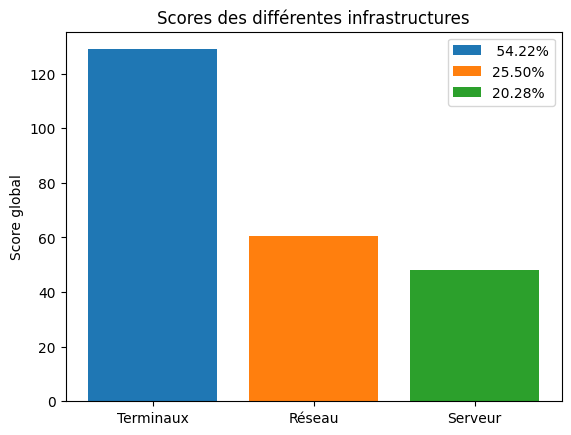

In [90]:
impact_total = calcul_impact_total(qualite_video='HD')

score_total,_ = calcul_score_global(impact_total['total']['gwp'],impact_total['total']['adpe'],impact_total['total']['adpf'])
score_terminal,_ = calcul_score_global(impact_total['terminal']['gwp'],impact_total['terminal']['adpe'],impact_total['terminal']['adpf'])
score_serveur,_ = calcul_score_global(impact_total['serveur']['gwp'],impact_total['serveur']['adpe'],impact_total['serveur']['adpf'])
score_reseau,_ = calcul_score_global(impact_total['reseau']['gwp'],impact_total['reseau']['adpe'],impact_total['reseau']['adpf'])


fig, ax = plt.subplots()
scores = [score_terminal,score_reseau,score_serveur]
infrastructures  =  ['Terminaux', 'Réseau', 'Serveur']
bar_labels = [f" {(score_terminal/score_total)*100:.2f}%", f"{(score_reseau/score_total)*100:.2f}%", f"{(score_serveur/score_total)*100:.2f}%"]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']
ax.bar(infrastructures,scores,label=bar_labels,color=bar_colors)
ax.set_ylabel("Score global")
ax.set_title("Scores des différentes infrastructures")
ax.legend()

print(f" Score total (valeur de référence) : {score_total}")
print(f" Score terminaux : {score_terminal}")
print(f" Score serveur : {score_serveur}")
print(f" Score reseau : {score_reseau}")

### Etude de sensibilité (Choix du terminal)

### Téléphone en réseau mobile

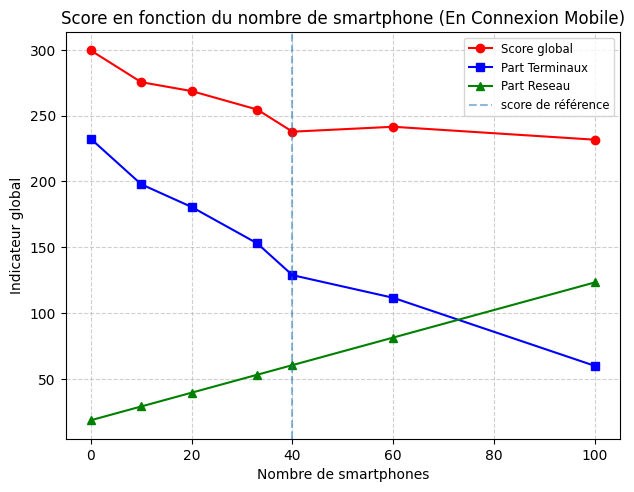

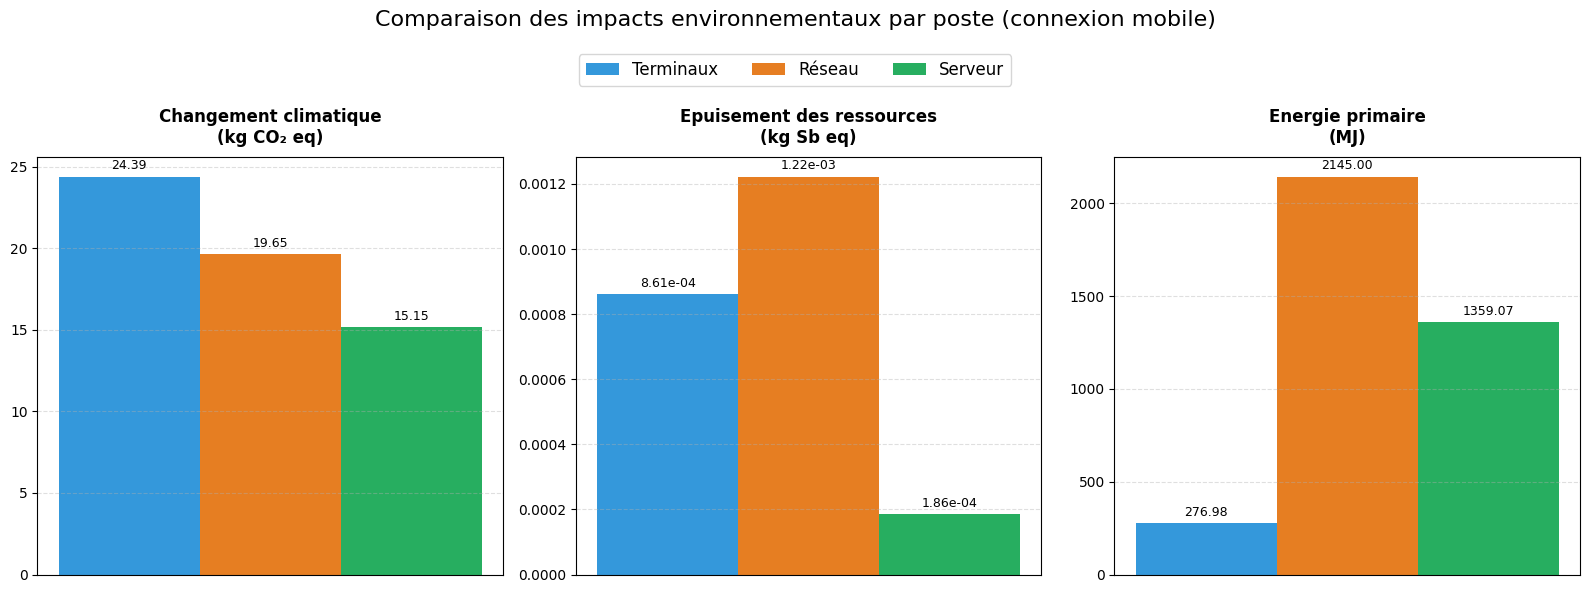

231.69914145631327


In [95]:
def analyse_mode_transmission(qualite='HD') : 
    """ 
    Analyse de l'influence de la répartission smartphone/laptop/pc
    """

    nb_smartphones = [0,10,20,33,40,60,100]
    nb_lap =[50,50,45,40,40,25,0]
    scores_total =[]
    scores_terminal=[]
    scores_reseau =[]


    for i, nb_sm in enumerate(nb_smartphones) :
        impact = calcul_impact_total(nb_laptop=nb_lap[i], nb_smartphone=nb_sm)

        score_total,_ = calcul_score_global(impact['total']['gwp'],impact['total']['adpe'],impact['total']['adpf'])
        score_terminal,_ = calcul_score_global(impact['terminal']['gwp'],impact['terminal']['adpe'],impact['terminal']['adpf'])
        score_reseau,_ = calcul_score_global(impact['reseau']['gwp'],impact['reseau']['adpe'],impact['reseau']['adpf'])
        
        

        scores_total.append(score_total)
        scores_terminal.append(score_terminal)
        scores_reseau.append(score_reseau)
        
        
    
    plt.plot(nb_smartphones,scores_total,label="Score global",color="red", marker= 'o')
    plt.plot(nb_smartphones,scores_terminal,label="Part Terminaux", color ="blue", marker="s" )
    plt.plot(nb_smartphones,scores_reseau,label="Part Reseau",color="green", marker="^")
    plt.grid(True, linestyle='--', alpha=0.6) # Quadrillage
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.xlabel("Nombre de smartphones")
    plt.ylabel("Indicateur global")
    plt.axvline(x=40,alpha=0.5,label="score de référence",linestyle ='--')
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.title("Score en fonction du nombre de smartphone (En Connexion Mobile)")
    plt.show()
    # 1. Configuration des Titres et des Clés de données
    titles = [
        "Changement climatique\n(kg CO₂ eq)", 
        "Epuisement des ressources\n(kg Sb eq)", 
        "Energie primaire\n(MJ)"
    ]

    # Les clés de ton dictionnaire 'impact' pour chaque indicateur
    # (Assure-toi que ce sont bien les noms utilisés dans ton calcul précédent)
    keys = ['gwp', 'adpe', 'adpf'] 

    x = np.arange(1)
    largeur = 0.25

    # Couleurs
    couleur_terminaux = "#3498db" # Bleu
    couleur_reseau = "#e67e22"    # Orange
    couleur_serveur = "#27ae60"   # Vert

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    # 2. BOUCLE AUTOMATIQUE (Pour remplir les 3 graphiques)
    for i, ax in enumerate(axes):
        current_key = keys[i] # ex: 'gwp' au tour 0, 'adpe' au tour 1...
        
        # Récupération des valeurs correspondantes
        val_term = impact['terminal'][current_key]
        val_res  = impact['reseau'][current_key]
        val_serv = impact['serveur'][current_key]
        
        # Création des barres
        # Note : On met le label ici pour que la légende globale le retrouve
        ax.bar(x - largeur, val_term, width=largeur, color=couleur_terminaux, label='Terminaux')
        ax.bar(x,           val_res,  width=largeur, color=couleur_reseau,    label='Réseau')
        ax.bar(x + largeur, val_serv, width=largeur, color=couleur_serveur,   label='Serveur')
        
        # Titre et Style du sous-graphique
        ax.set_title(titles[i], fontsize=12, fontweight='bold', pad=10)
        ax.set_xticks([]) # On enlève les ticks X inutiles
        ax.grid(axis="y", linestyle="--", alpha=0.4)
        
        # Petit bonus : Afficher la valeur au dessus de la barre
        # (Utile car les échelles sont très différentes)
        for p in ax.patches:
            height = p.get_height()
            # On utilise la notation scientifique si le chiffre est très petit (Ressources)
            fmt = "{:.2e}" if height < 0.01 else "{:.2f}"
            ax.annotate(fmt.format(height),
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points de décalage vertical
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    # 3. Légende globale et Titre
    # On récupère les handles/labels du premier graphique pour faire la légende unique
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.92), ncol=3, fontsize=12)

    fig.suptitle("Comparaison des impacts environnementaux par poste (connexion mobile)", fontsize=16, y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.90]) # Laisse de la place pour le titre et la légende en haut
    plt.show()
    
    print(scores_total[-1])
        

analyse_mode_transmission()   

### Téléphone en réseau mobilfixe

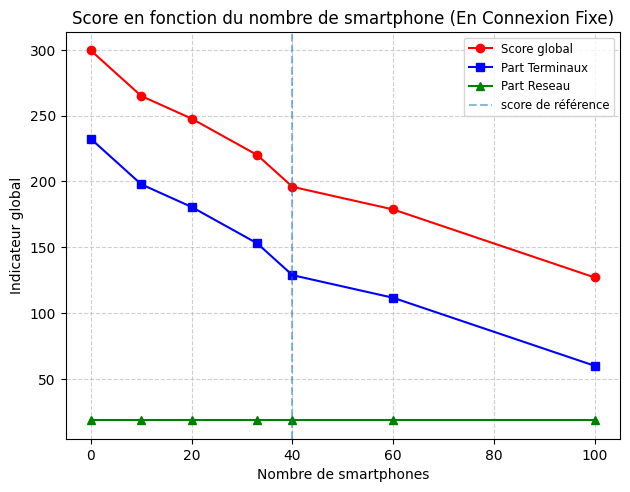

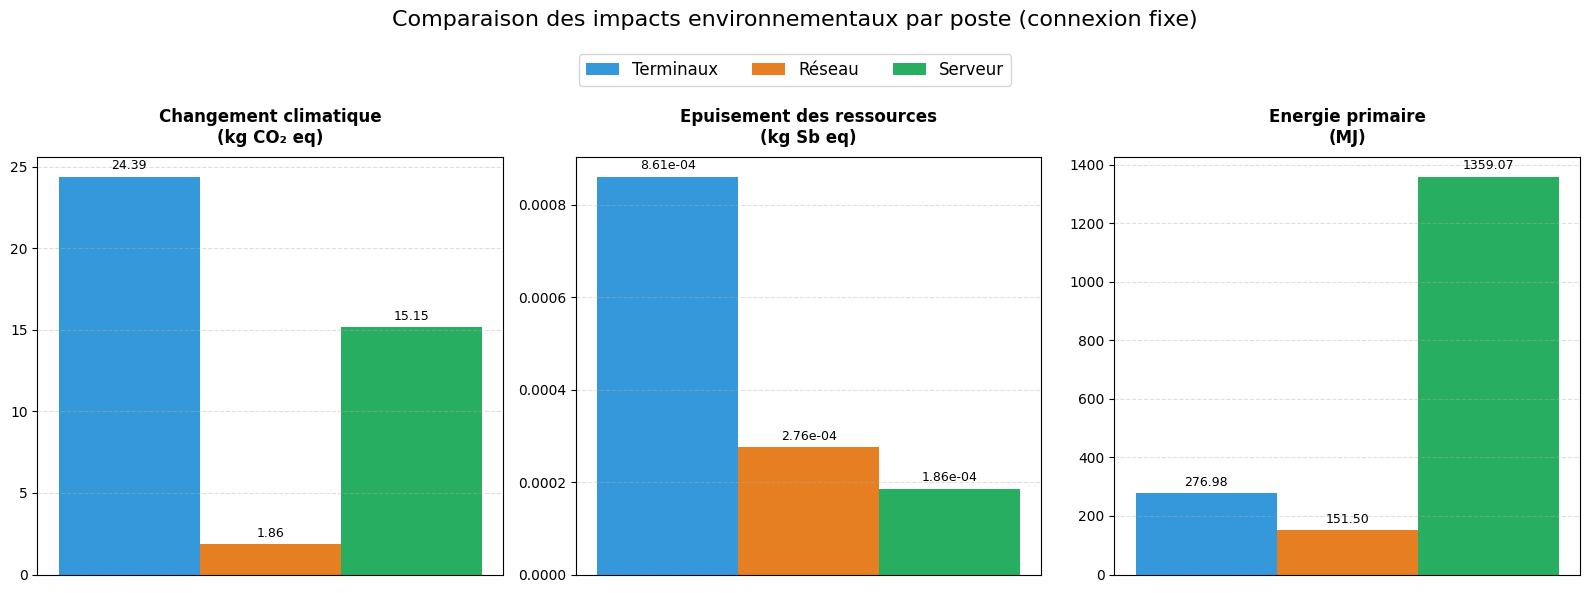

127.13104100873964


In [94]:
def analyse_mode_transmission_wifi(qualite='HD') : 
    """ 
    Analyse de l'influence de la répartission smartphone/laptop/pc
    """

    nb_smartphones = [0,10,20,33,40,60,100]
    nb_lap =[50,50,45,40,40,25,0]
    scores_total =[]
    scores_terminal=[]
    scores_reseau =[]


    for i, nb_sm in enumerate(nb_smartphones) :
        impact = calcul_impact_total_tout_wifi(nb_laptop=nb_lap[i], nb_smartphone=nb_sm)

        score_total,_ = calcul_score_global(impact['total']['gwp'],impact['total']['adpe'],impact['total']['adpf'])
        score_terminal,_ = calcul_score_global(impact['terminal']['gwp'],impact['terminal']['adpe'],impact['terminal']['adpf'])
        score_reseau,_ = calcul_score_global(impact['reseau']['gwp'],impact['reseau']['adpe'],impact['reseau']['adpf'])
        
        

        scores_total.append(score_total)
        scores_terminal.append(score_terminal)
        scores_reseau.append(score_reseau)
        
        
    
    plt.plot(nb_smartphones,scores_total,label="Score global",color="red", marker= 'o')
    plt.plot(nb_smartphones,scores_terminal,label="Part Terminaux", color ="blue", marker="s" )
    plt.plot(nb_smartphones,scores_reseau,label="Part Reseau",color="green", marker="^")
    plt.grid(True, linestyle='--', alpha=0.6) # Quadrillage
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.xlabel("Nombre de smartphones")
    plt.ylabel("Indicateur global")
    plt.axvline(x=40,alpha=0.5,label="score de référence",linestyle ='--')
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.title("Score en fonction du nombre de smartphone (En Connexion Fixe)")
    plt.show()

    keys = ['gwp', 'adpe', 'adpf'] 

    x = np.arange(1)
    largeur = 0.25

    # Couleurs
    couleur_terminaux = "#3498db" # Bleu
    couleur_reseau = "#e67e22"    # Orange
    couleur_serveur = "#27ae60"   # Vert

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    # 2. BOUCLE AUTOMATIQUE (Pour remplir les 3 graphiques)
    for i, ax in enumerate(axes):
        current_key = keys[i] # ex: 'gwp' au tour 0, 'adpe' au tour 1...
        
        # Récupération des valeurs correspondantes
        val_term = impact['terminal'][current_key]
        val_res  = impact['reseau'][current_key]
        val_serv = impact['serveur'][current_key]
        
        # Création des barres
        # Note : On met le label ici pour que la légende globale le retrouve
        ax.bar(x - largeur, val_term, width=largeur, color=couleur_terminaux, label='Terminaux')
        ax.bar(x,           val_res,  width=largeur, color=couleur_reseau,    label='Réseau')
        ax.bar(x + largeur, val_serv, width=largeur, color=couleur_serveur,   label='Serveur')
        
        # Titre et Style du sous-graphique
        ax.set_title(titles[i], fontsize=12, fontweight='bold', pad=10)
        ax.set_xticks([]) # On enlève les ticks X inutiles
        ax.grid(axis="y", linestyle="--", alpha=0.4)
        
        # Petit bonus : Afficher la valeur au dessus de la barre
        # (Utile car les échelles sont très différentes)
        for p in ax.patches:
            height = p.get_height()
            # On utilise la notation scientifique si le chiffre est très petit (Ressources)
            fmt = "{:.2e}" if height < 0.01 else "{:.2f}"
            ax.annotate(fmt.format(height),
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points de décalage vertical
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    # 3. Légende globale et Titre
    # On récupère les handles/labels du premier graphique pour faire la légende unique
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.92), ncol=3, fontsize=12)

    fig.suptitle("Comparaison des impacts environnementaux par poste (connexion fixe)", fontsize=16, y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.90]) # Laisse de la place pour le titre et la légende en haut
    plt.show()
    print(scores_total[-1])
        
analyse_mode_transmission_wifi()        

122.51772196851171


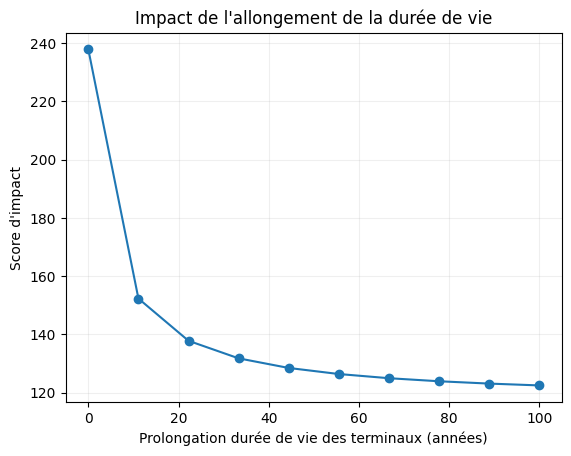

In [41]:
import copy
def analyse_allongement_vie_appareils(annee_max):
    annees = np.linspace(0,annee_max,10)
    annee_initial = copy.deepcopy(appareils)
    scores = []

    for a in annees :
        #Ajout des années 
        appareils['smartphone']['duree_vie']  = annee_initial['smartphone']['duree_vie'] + a
        appareils['pc_fixe']['duree_vie']  = annee_initial['pc_fixe']['duree_vie'] + a
        appareils['ecran']['duree_vie']  = annee_initial['ecran']['duree_vie'] + a
        appareils['laptop']['duree_vie']  = annee_initial['laptop']['duree_vie']+ a
        #Calcul de l'impact 
        impact = calcul_impact_total()
        score_total,_ = calcul_score_global(impact['total']['gwp'],impact['total']['adpe'],impact['total']['adpf'])
        scores.append(score_total)
    
    #Reset des valeurs 
    appareils['smartphone']['duree_vie']  = annee_initial['smartphone']['duree_vie'] 
    appareils['pc_fixe']['duree_vie']  = annee_initial['pc_fixe']['duree_vie'] 
    appareils['ecran']['duree_vie']  = annee_initial['ecran']['duree_vie'] 
    appareils['laptop']['duree_vie']  = annee_initial['laptop']['duree_vie']
    

        
    plt.plot(annees,scores, marker='o')
    plt.xlabel("Prolongation durée de vie des terminaux (années)")
    plt.ylabel("Score d'impact")
    plt.title("Impact de l'allongement de la durée de vie")
    plt.grid(True, alpha = 0.2)
    print(scores[-1])
 
analyse_allongement_vie_appareils(100)


In [42]:
(189.6 - 238)/238

-0.20336134453781515